# Part 3: Models

# Installing Libraries

In [24]:
!pip install tensorflow seaborn


# Mounting Content from drive to Google Colab

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating Zip Path

In [27]:
zip_path = '/content/drive/MyDrive/split/split.zip'


In [ ]:
Listing Contents to zipfile

In [28]:
import zipfile
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
os.listdir('/content/split')


['train', '.DS_Store', 'validation', 'test']

In [29]:
import os

zip_path = '/content/drive/MyDrive/split/split.zip'
os.path.exists(zip_path)
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
['train', 'validation', 'test']




['train', 'validation', 'test']

 Inside each split, create subdirectories for the classes:
  - `CORROSION`
  - `NOCORROSION`

In [30]:
import os

base_dir = '/content/split'

train_dir = os.path.join(base_dir, 'train')
train_CORROSION_dir = os.path.join(train_dir, 'CORROSION')
train_NOCORROSION_dir = os.path.join(train_dir, 'NOCORROSION')

validation_dir = os.path.join(base_dir, 'validation')
validation_CORROSION_dir = os.path.join(validation_dir, 'CORROSION')
validation_NOCORROSION_dir = os.path.join(validation_dir, 'NOCORROSION')

test_dir = os.path.join(base_dir, 'test')
test_CORROSION_dir = os.path.join(test_dir, 'CORROSION')
test_NOCORROSION_dir = os.path.join(test_dir, 'NOCORROSION')


# Printing number of images in each subdirectory

In [11]:
def num_files_in_directory(path):
    return len([file for file in os.listdir(path) if file.endswith('.jpg')])

print("[Train] CORROSION:", num_files_in_directory(train_CORROSION_dir))
print("[Train] NOCORROSION:", num_files_in_directory(train_NOCORROSION_dir))

print("[Validation] CORROSION:", num_files_in_directory(validation_CORROSION_dir))
print("[Validation] NOCORROSION:", num_files_in_directory(validation_NOCORROSION_dir))

print("[Test] CORROSION:", num_files_in_directory(test_CORROSION_dir))
print("[Test] NOCORROSION:", num_files_in_directory(test_NOCORROSION_dir))


[Train] CORROSION: 693
[Train] NOCORROSION: 580
[Validation] CORROSION: 198
[Validation] NOCORROSION: 166
[Test] CORROSION: 99
[Test] NOCORROSION: 83


# Data Loading, Model Training, and Evaluation

This section performs the following steps:

1. **Data Generators with Augmentation**
   - `ImageDataGenerator` is used to load images from the training, validation, and test directories.
   - Training images are augmented with rotation, shifts, shear, zoom, and horizontal flip to improve generalization.
   - Validation and test images are only rescaled.

2. **CNN Model Definition**
   - Defines a sequential CNN with 4 convolutional layers (16 → 32 → 64 → 128 filters) with ReLU activation and max pooling.
   - Flattened output is passed to a dense layer with 256 units and dropout.
   - Final layer uses sigmoid activation for binary classification.

3. **Training**
   - Model is trained for 20 epochs on the training data.
   - Validation data is used to monitor performance after each epoch.

4. **Evaluation and Visualization**
   - Generates plots for training/validation loss and accuracy.
   - Computes confusion matrix, ROC curve, and AUC score.
   - Prints summary statistics: Accuracy, Precision, Recall, Specificity, and F1 Score.


Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 806ms/step - accuracy: 0.5671 - loss: 0.6841 - val_accuracy: 0.6236 - val_loss: 0.6626
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 645ms/step - accuracy: 0.6644 - loss: 0.6515 - val_accuracy: 0.6758 - val_loss: 0.6218
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 643ms/step - accuracy: 0.7017 - loss: 0.6043 - val_accuracy: 0.7308 - val_loss: 0.5881
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 631ms/step - accuracy: 0.6951 - loss: 0.5957 - val_accuracy: 0.7060 - val_loss: 0.5871
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 651ms/step - accuracy: 0.7423 - loss: 0.5446 - val_accuracy: 0.7088 - val_loss: 0.5834
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 641ms/step - accuracy: 0.7198 - loss: 0.5540 - val_accuracy: 0.7253 - val_loss: 0.5723
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step - accuracy: 0.7532 - loss: 0.5153 - val_accuracy: 0.7582 - val_loss: 0.5044
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 610ms/step - accuracy: 0.7499 - loss: 0.5211 - val_accu

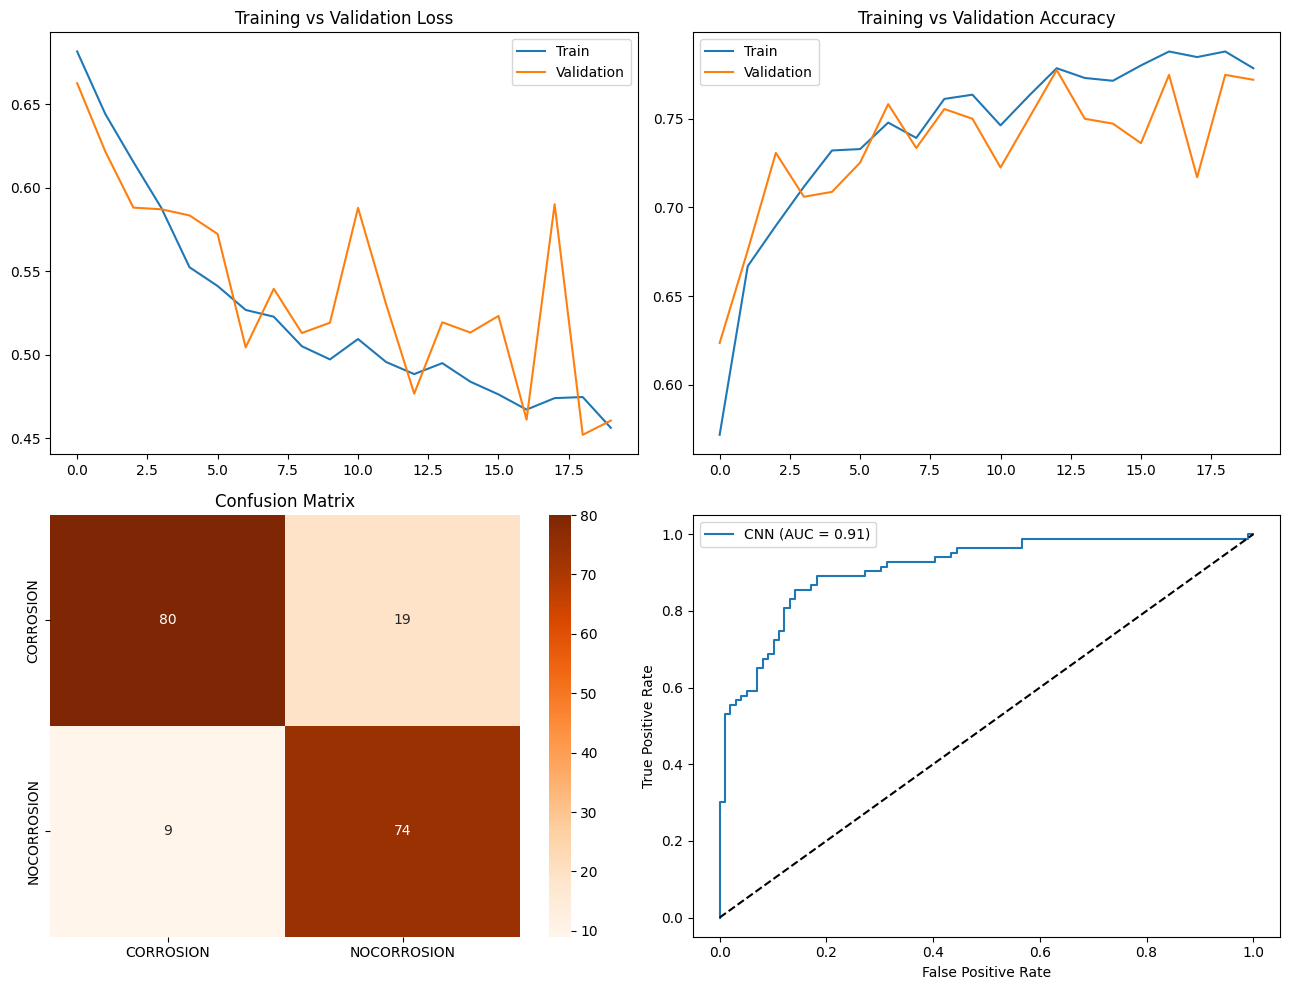


[Summary Statistics]
Accuracy = 84.62% | Precision = 89.89% | Recall = 80.81% | Specificity = 89.16% | F1 Score = 85.11%


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# DATA GENERATORS

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

def build_model_1():
    cnn = Sequential([
        InputLayer(input_shape=(128, 128, 3)),
        Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return cnn

cnn = build_model_1()


# TRAINING (20 EPOCHS)


cnn_model = cnn.fit(
    train_generator,
    epochs=20,    # first trying with 20
    validation_data=val_generator,
    verbose=1
)


# CHARTS + METRICS


def create_charts(cnn, cnn_model):
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    train_acc = cnn_model.history['accuracy']
    val_acc = cnn_model.history['val_accuracy']

    y_true = test_generator.classes
    Y_pred = cnn.predict(test_generator, steps=len(test_generator))
    y_pred = (Y_pred > 0.5).astype(int).flatten()
    y_pred_prob = Y_pred.flatten()

    fig = plt.figure(figsize=(13, 10))

    # Plot 1: Loss
    plt.subplot(2,2,1)
    plt.title("Training vs Validation Loss")
    plt.plot(train_loss, label='Train')
    plt.plot(val_loss, label='Validation')
    plt.legend()

    # Plot 2: Accuracy
    plt.subplot(2,2,2)
    plt.title("Training vs Validation Accuracy")
    plt.plot(train_acc, label='Train')
    plt.plot(val_acc, label='Validation')
    plt.legend()

    # Plot 3: Confusion Matrix
    plt.subplot(2,2,3)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['CORROSION', 'NOCORROSION'],
                yticklabels=['CORROSION', 'NOCORROSION'])
    plt.title("Confusion Matrix")

    # Plot 4: ROC Curve
    plt.subplot(2,2,4)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'CNN (AUC = {auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Summary
    TP, FN, FP, TN = cm.ravel()
    accuracy = (TP + TN) / np.sum(cm)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = 2 * precision * recall / (precision + recall)
    print(f"\n[Summary Statistics]\nAccuracy = {accuracy:.2%} | Precision = {precision:.2%} | Recall = {recall:.2%} | Specificity = {specificity:.2%} | F1 Score = {f1:.2%}")

create_charts(cnn, cnn_model)


In [13]:

train_dir = '/content/split/train'
train_CORROSION_dir = '/content/split/train/CORROSION/'
train_NOCORROSION_dir = '/content/split/train/NOCORROSION/'

validation_dir = '/content/split/validation'
validation_CORROSION_dir = '/content/split/validation/CORROSION/'
validation_NOCORROSION_dir = '/content/split/validation/NOCORROSION/'

test_dir = '/content/split/test'
test_CORROSION_dir = '/content/split/test/CORROSION/'
test_NOCORROSION_dir = '/content/split/test/NOCORROSION/'


# CNN Training with Augmented Images

In this section, we train our convolutional neural network (CNN) using the augmented image dataset.
We then evaluate its performance on the test set and visualize metrics such as loss, accuracy, confusion matrix, and ROC curve.


Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 684ms/step - accuracy: 0.8184 - loss: 0.4354 - val_accuracy: 0.7830 - val_loss: 0.4543
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 651ms/step - accuracy: 0.7982 - loss: 0.4506 - val_accuracy: 0.7802 - val_loss: 0.4604
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 673ms/step - accuracy: 0.7785 - loss: 0.4440 - val_accuracy: 0.7802 - val_loss: 0.4721
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 662ms/step - accuracy: 0.8277 - loss: 0.4053 - val_accuracy: 0.7995 - val_loss: 0.4350
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 644ms/step - accuracy: 0.7948 - loss: 0.4463 - val_accuracy: 0.7637 - val_loss: 0.4853
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 645ms/step - accuracy: 0.7938 - loss: 0.4413 - val_accuracy: 0.7940 - val_loss: 0.4389
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 677ms/step - accuracy: 0.8108 - loss: 0.4261 - val_accuracy: 0.8077 - val_loss: 0.4270
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 609ms/step - accuracy: 0.7991 - loss: 0.4197 - val_accu

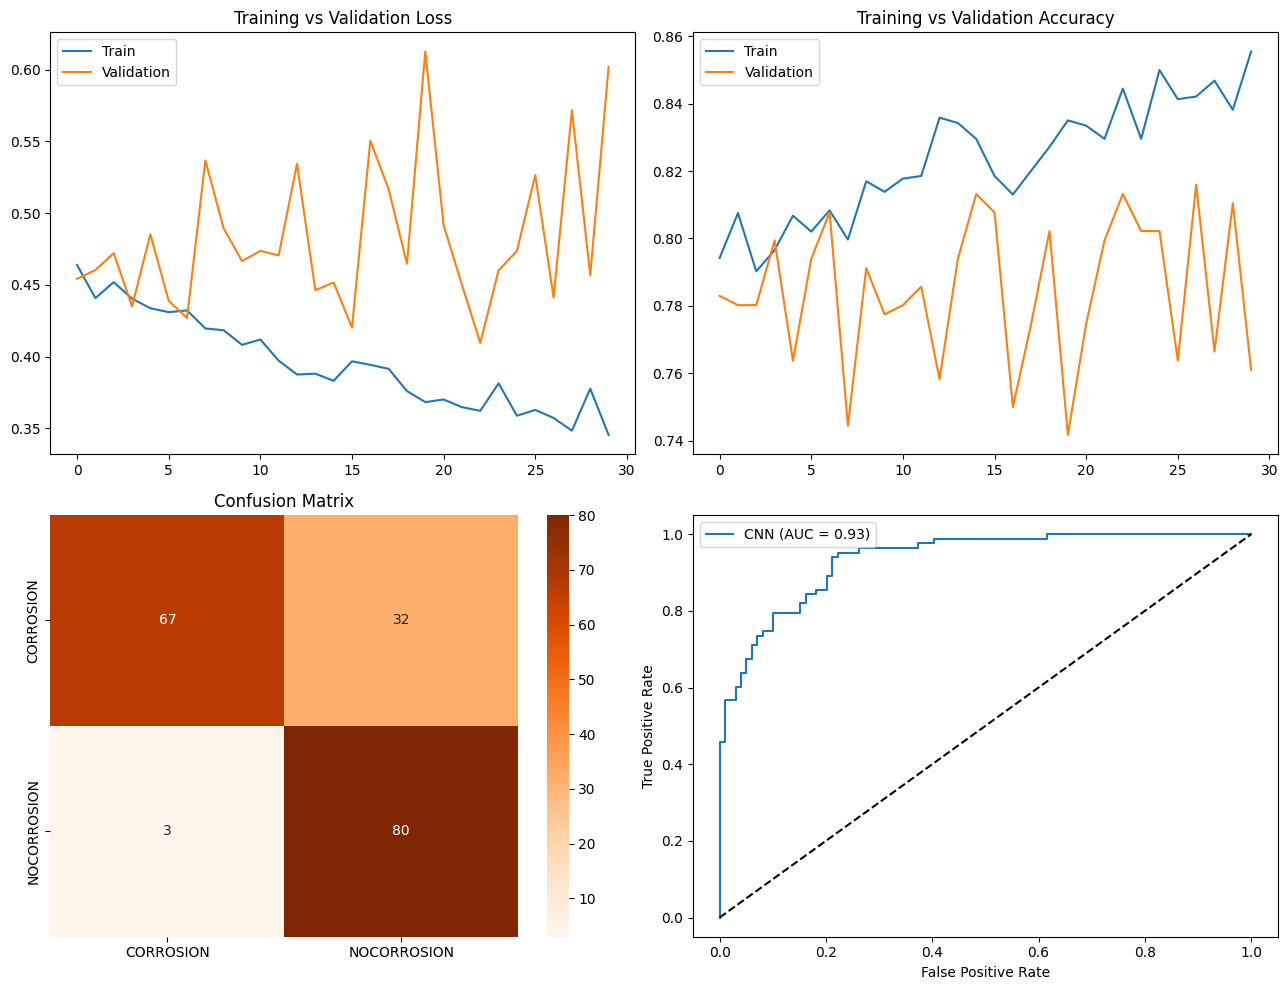


[Summary Statistics]
Accuracy = 80.77% | Precision = 95.71% | Recall = 67.68% | Specificity = 96.39% | F1 Score = 79.29%


In [14]:

# Image Data Generators with Augmentation


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True,
    seed = 42
)

val_generator = val_datagen.flow_from_directory(
    directory = validation_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)


# Train the CNN model (30 epochs)


cnn_model = cnn.fit(
    train_generator,
    epochs = 30,   # slightly increasing epoch to 30
    steps_per_epoch = len(train_generator),
    validation_data = val_generator,
    validation_steps = len(val_generator),
    verbose = 1
)


# Plot results and summary


create_charts(cnn, cnn_model)


# CNN Model 3 Training with Data Augmentation

This section defines and trains Model 3 of our CNN on the augmented dataset.
We use 30 epochs and monitor both training and validation performance, followed by plotting metrics and evaluation results.


Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 716ms/step - accuracy: 0.5584 - loss: 0.6861 - val_accuracy: 0.5659 - val_loss: 0.6732
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 635ms/step - accuracy: 0.5944 - loss: 0.6601 - val_accuracy: 0.6511 - val_loss: 0.6305
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 629ms/step - accuracy: 0.6316 - loss: 0.6354 - val_accuracy: 0.6538 - val_loss: 0.6284
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 624ms/step - accuracy: 0.6769 - loss: 0.6098 - val_accuracy: 0.7280 - val_loss: 0.5802
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 661ms/step - accuracy: 0.6987 - loss: 0.5863 - val_accuracy: 0.6648 - val_loss: 0.6064
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 671ms/step - accuracy: 0.6938 - loss: 0.5776 - val_accuracy: 0.7473 - val_loss: 0.5392
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 658ms/step - accuracy: 0.7123 - loss: 0.5599 - val_accuracy: 0.7060 - val_loss: 0.5774
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 650ms/step - accuracy: 0.7043 - loss: 0.5660 - val_accu

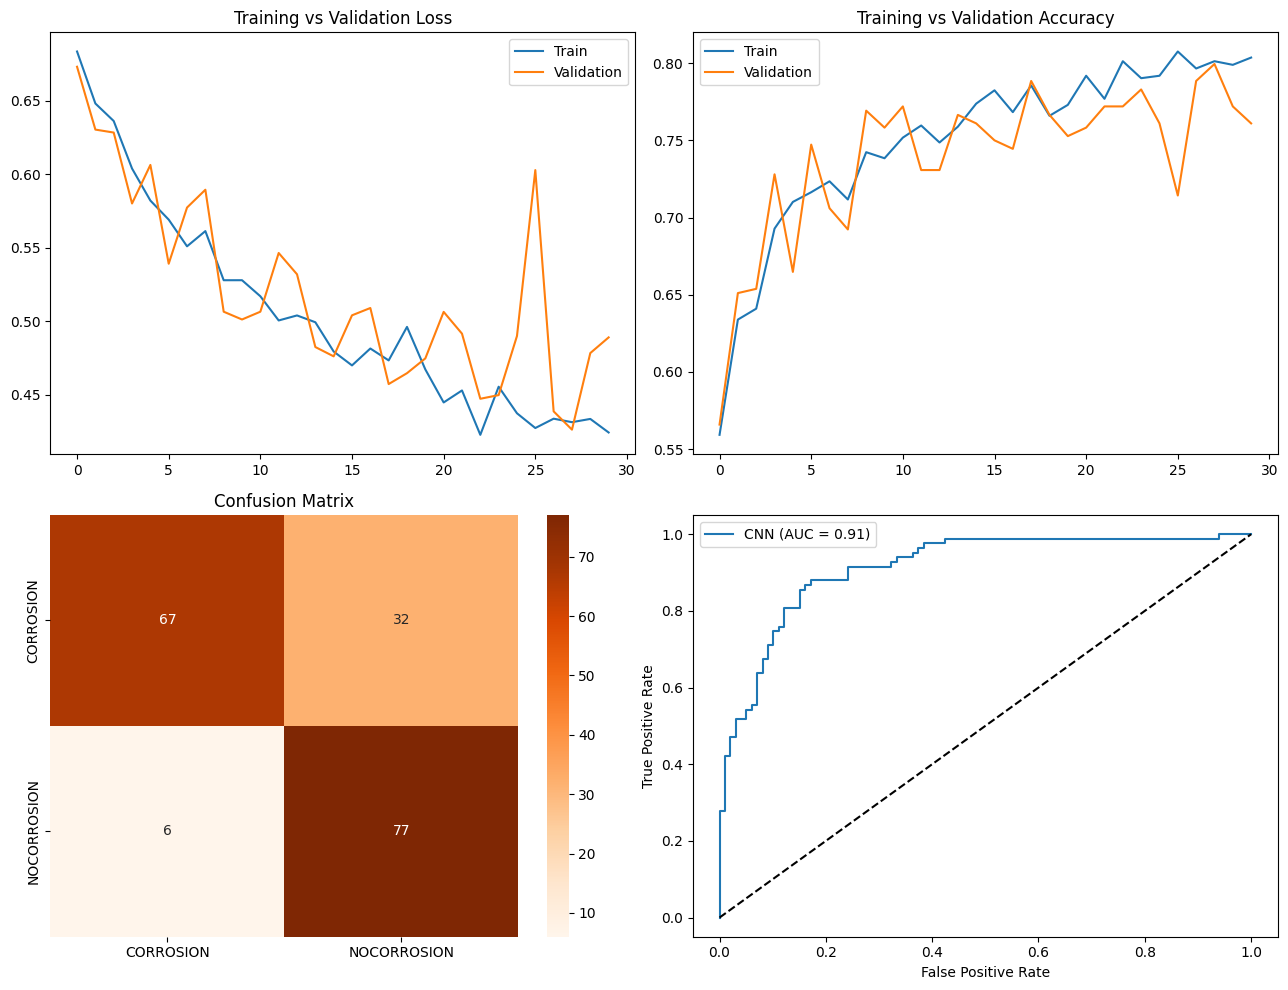


[Summary Statistics]
Accuracy = 79.12% | Precision = 91.78% | Recall = 67.68% | Specificity = 92.77% | F1 Score = 77.91%


In [17]:

# DATA GENERATORS WITH AUGMENTATION


train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


# CNN MODEL - MODEL 3


def build_model_3():
    cnn = Sequential([
        InputLayer(input_shape=(128, 128, 3)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return cnn

cnn_3 = build_model_3()


# TRAIN MODEL 3 (30 EPOCHS)


cnn_model_3 = cnn_3.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1
)


# PLOT RESULTS AND SUMMARY


create_charts(cnn_3, cnn_model_3)


# CNN Model 4 Training with Augmentation

In this section, we define Model 4 of our CNN with added Dropout layers to reduce overfitting.
The model is trained for 30 epochs on the augmented dataset, and results are visualized with training metrics and evaluation plots.


Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 753ms/step - accuracy: 0.5276 - loss: 0.6941 - val_accuracy: 0.4863 - val_loss: 0.6895
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 622ms/step - accuracy: 0.5911 - loss: 0.6797 - val_accuracy: 0.5714 - val_loss: 0.6673
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 643ms/step - accuracy: 0.6435 - loss: 0.6615 - val_accuracy: 0.6374 - val_loss: 0.6491
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 627ms/step - accuracy: 0.6873 - loss: 0.6391 - val_accuracy: 0.6264 - val_loss: 0.6419
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 636ms/step - accuracy: 0.6854 - loss: 0.6209 - val_accuracy: 0.6236 - val_loss: 0.6436
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 637ms/step - accuracy: 0.6822 - loss: 0.6173 - val_accuracy: 0.7280 - val_loss: 0.5878
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 631ms/step - accuracy: 0.7261 - loss: 0.5931 - val_accuracy: 0.7170 - val_loss: 0.5665
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 666ms/step - accuracy: 0.7312 - loss: 0.5607 - val_accu

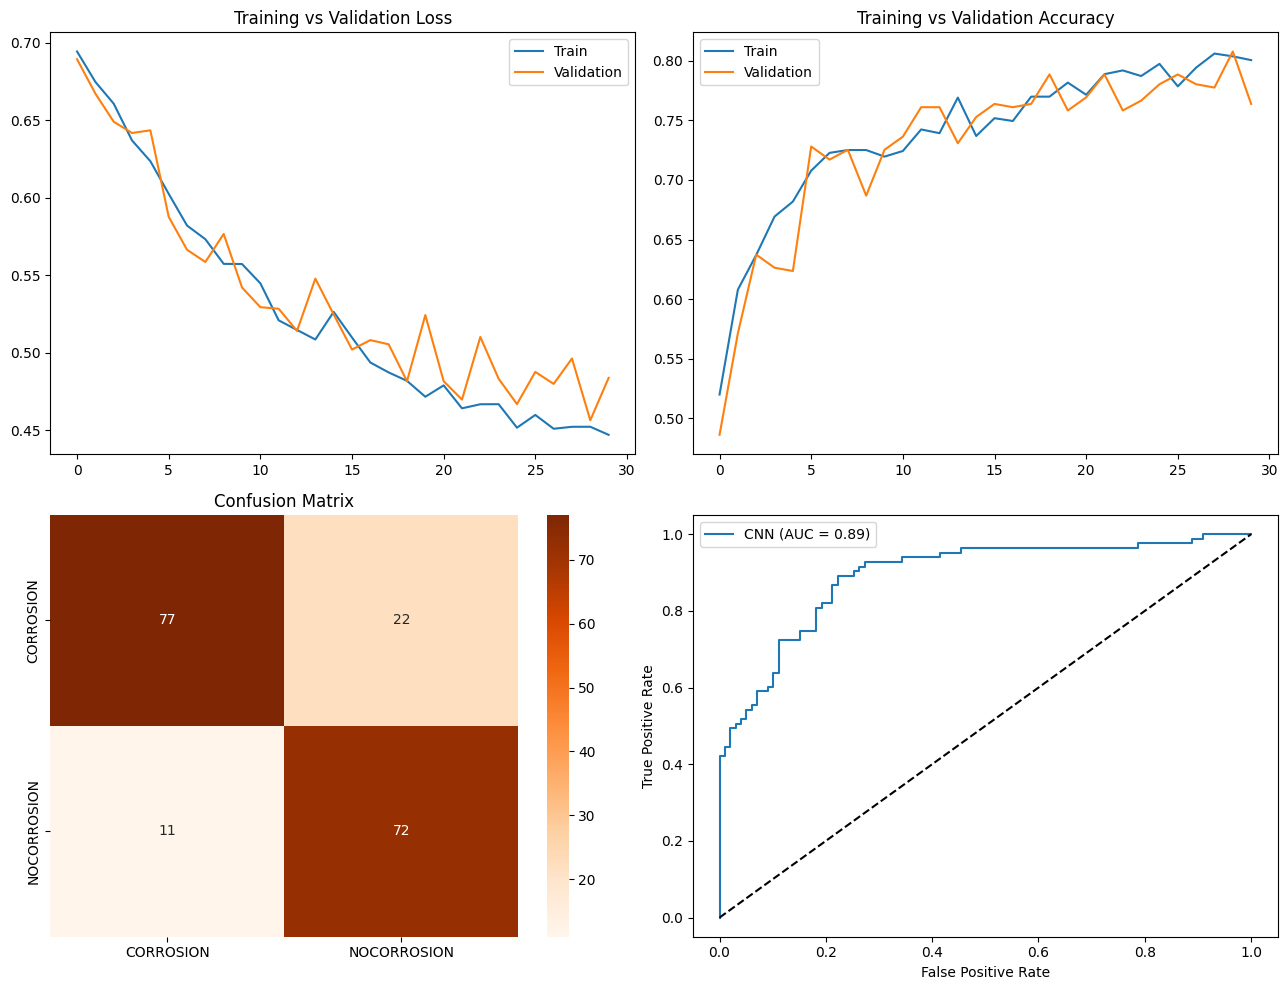


[Summary Statistics]
Accuracy = 81.87% | Precision = 87.50% | Recall = 77.78% | Specificity = 86.75% | F1 Score = 82.35%


In [18]:

# DATA GENERATORS WITH AUGMENTATION


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


# CNN MODEL - MODEL 4


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

def build_model_4():
    cnn = Sequential([
        InputLayer(input_shape=(128, 128, 3)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return cnn

cnn_4 = build_model_4()


# TRAIN MODEL 4 (30 EPOCHS)


cnn_model_4 = cnn_4.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1
)


# PLOT RESULTS AND SUMMARY


create_charts(cnn_4, cnn_model_4)


# CNN Model 5 with Early Stopping

Model 5 uses progressive Dropout and EarlyStopping to stop training once validation loss stops improving.
It can train up to 100 epochs, and results are displayed using performance charts.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 760ms/step - accuracy: 0.5260 - loss: 0.6958 - val_accuracy: 0.5137 - val_loss: 0.6865
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 628ms/step - accuracy: 0.5899 - loss: 0.6721 - val_accuracy: 0.6896 - val_loss: 0.6455
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 637ms/step - accuracy: 0.6446 - loss: 0.6488 - val_accuracy: 0.6923 - val_loss: 0.6328
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 647ms/step - accuracy: 0.6278 - loss: 0.6403 - val_accuracy: 0.7060 - val_loss: 0.6376
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 640ms/step - accuracy: 0.6710 - loss: 0.6188 - val_accuracy: 0.7170 - val_loss: 0.6130
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 634ms/step - accuracy: 0.6935 - loss: 0.6112 - val_accuracy: 0.7335 - val_loss: 0.5865
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 638ms/step - accuracy: 0.6745 - loss: 0.5999 - val_accuracy: 0.7418 - val_loss: 0.5674
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 634ms/step - accuracy: 0.7216 - loss: 0.5776 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step


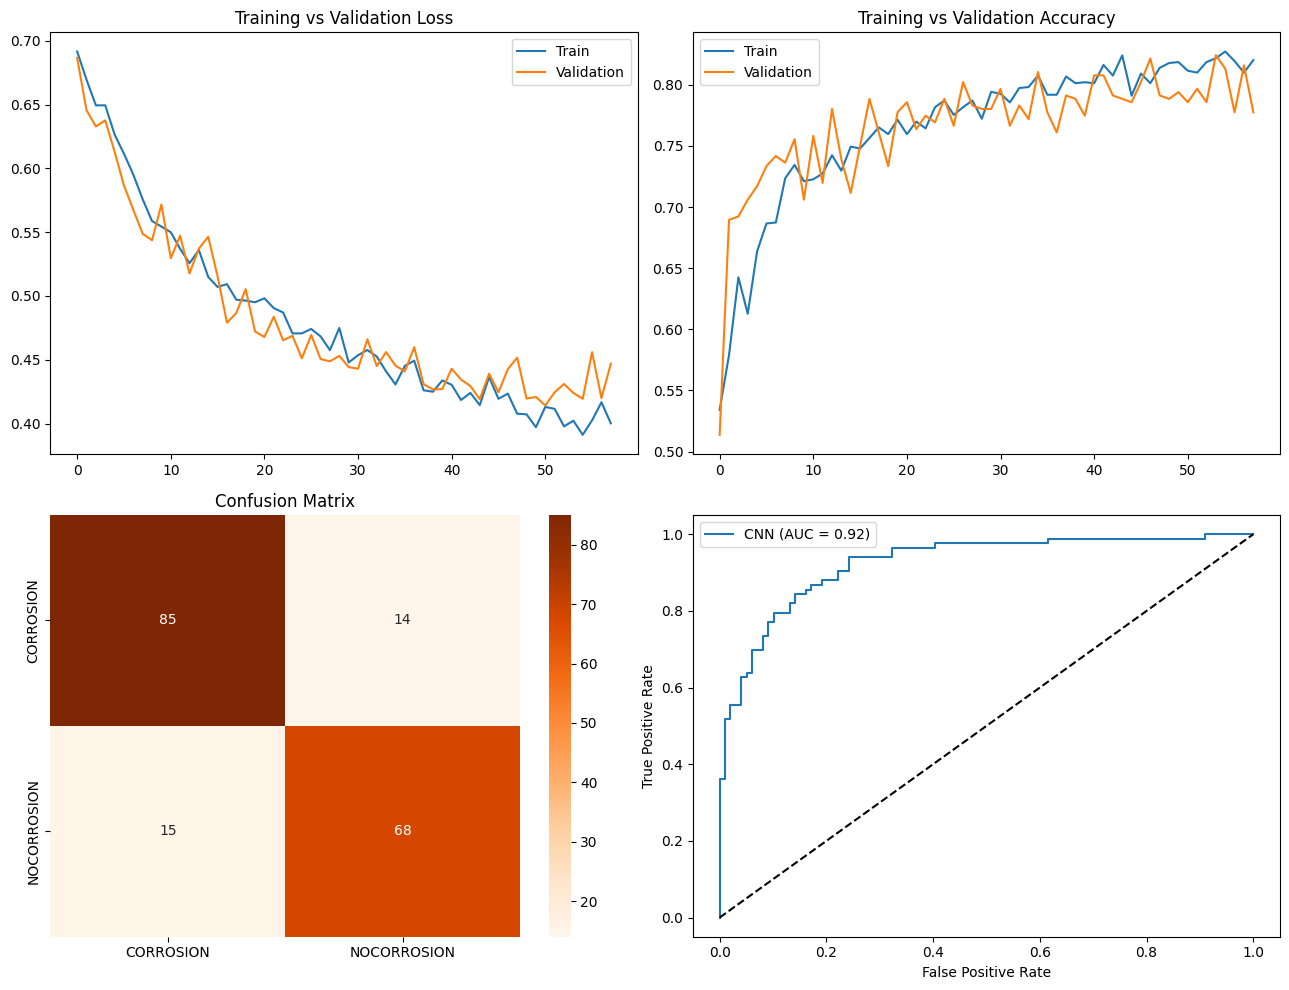


[Summary Statistics]
Accuracy = 84.07% | Precision = 85.00% | Recall = 85.86% | Specificity = 81.93% | F1 Score = 85.43%


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# EARLY STOPPING


es = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=7,
    restore_best_weights=True
)


# BUILD MODEL 5


def build_model_5():
    cnn = Sequential([
        InputLayer(input_shape=(128, 128, 3)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    cnn.compile(optimizer=Adam(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return cnn

cnn_5 = build_model_5()


# TRAIN MODEL 5


cnn_model_5 = cnn_5.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1,
    callbacks=[es]
)


# PLOT RESULTS AND SUMMARY


create_charts(cnn_5, cnn_model_5)


# CNN Model 6 with Increased Depth and Dropout

Model 6 increases convolutional depth and Dropout rates to better capture features while preventing overfitting.
Training is performed with EarlyStopping to save the best model.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 880ms/step - accuracy: 0.5242 - loss: 0.6922 - val_accuracy: 0.5467 - val_loss: 0.6865
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 640ms/step - accuracy: 0.6080 - loss: 0.6804 - val_accuracy: 0.6044 - val_loss: 0.6636
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 629ms/step - accuracy: 0.6642 - loss: 0.6450 - val_accuracy: 0.6868 - val_loss: 0.6340
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 635ms/step - accuracy: 0.6609 - loss: 0.6331 - val_accuracy: 0.7143 - val_loss: 0.6121
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 638ms/step - accuracy: 0.6912 - loss: 0.6131 - val_accuracy: 0.7033 - val_loss: 0.6089
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 632ms/step - accuracy: 0.6741 - loss: 0.6044 - val_accuracy: 0.6758 - val_loss: 0.6291
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 621ms/step - accuracy: 0.6837 - loss: 0.6071 - val_accuracy: 0.7335 - val_loss: 0.5665
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 626ms/step - accuracy: 0.7055 - loss: 0.5853 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step


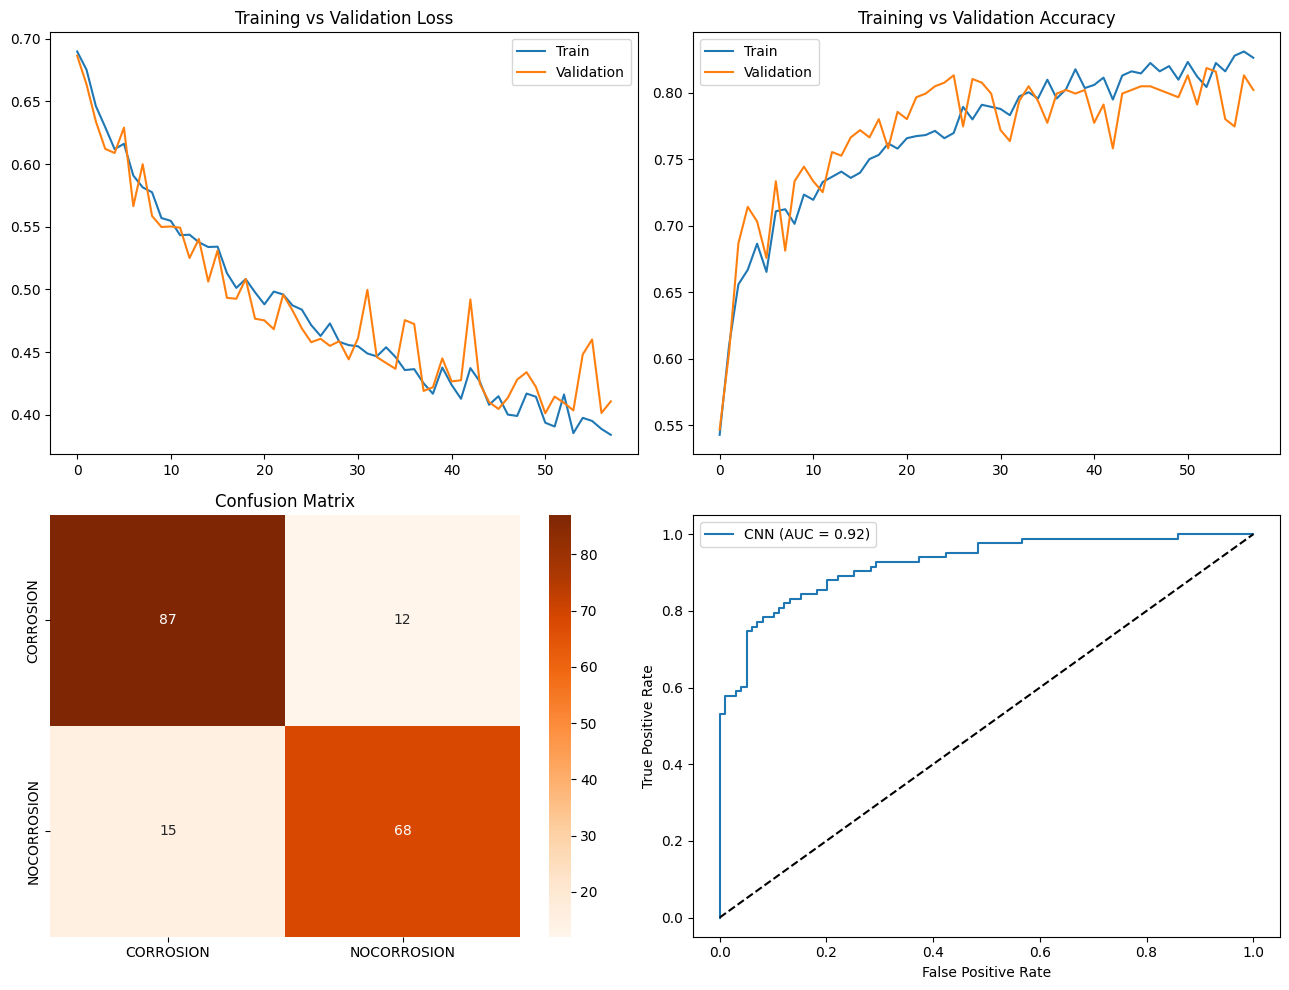


[Summary Statistics]
Accuracy = 85.16% | Precision = 85.29% | Recall = 87.88% | Specificity = 81.93% | F1 Score = 86.57%


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam


# EARLY STOPPING

es = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=7,
    restore_best_weights=True
)


# BUILD MODEL 6

def build_model_6():
    cnn = Sequential([
        InputLayer(input_shape=(128, 128, 3)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    cnn.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return cnn


# TRAIN MODEL 6

cnn_6 = build_model_6()

cnn_model_6 = cnn_6.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1,
    callbacks=[es]
)


# PLOT RESULTS AND SUMMARY

create_charts(cnn_6, cnn_model_6)


# CNN Model 7 with Deeper Dense Layer

Model 7 further increases the dense layer size and uses Dropout for regularization.
EarlyStopping ensures training stops once validation loss plateaus, with charts summarizing results.


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam


# EARLY STOPPING

es = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=7,
    restore_best_weights=True
)


# BUILD MODEL 7

def build_model_7():
    cnn = Sequential([
        InputLayer(input_shape=(128, 128, 3)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])

    cnn.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return cnn


# TRAIN MODEL 7

cnn_7 = build_model_7()

cnn_model_7 = cnn_7.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1,
    callbacks=[es]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 781ms/step - accuracy: 0.5172 - loss: 0.6969 - val_accuracy: 0.5495 - val_loss: 0.6892
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 637ms/step - accuracy: 0.5964 - loss: 0.6789 - val_accuracy: 0.7088 - val_loss: 0.6585
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 669ms/step - accuracy: 0.6481 - loss: 0.6437 - val_accuracy: 0.6484 - val_loss: 0.6396
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 653ms/step - accuracy: 0.6435 - loss: 0.6399 - val_accuracy: 0.7253 - val_loss: 0.6155
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 645ms/step - accuracy: 0.7188 - loss: 0.6016 - val_accuracy: 0.7308 - val_loss: 0.6026
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 662ms/step - accuracy: 0.6953 - loss: 0.5971 - val_accuracy: 0.7335 - val_loss: 0.5857
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 634ms/step - accuracy: 0.6933 - loss: 0.5893 - val_accuracy: 0.7473 - val_loss: 0.5539
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 629ms/step - accuracy: 0.7136 - loss: 0.5695 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step


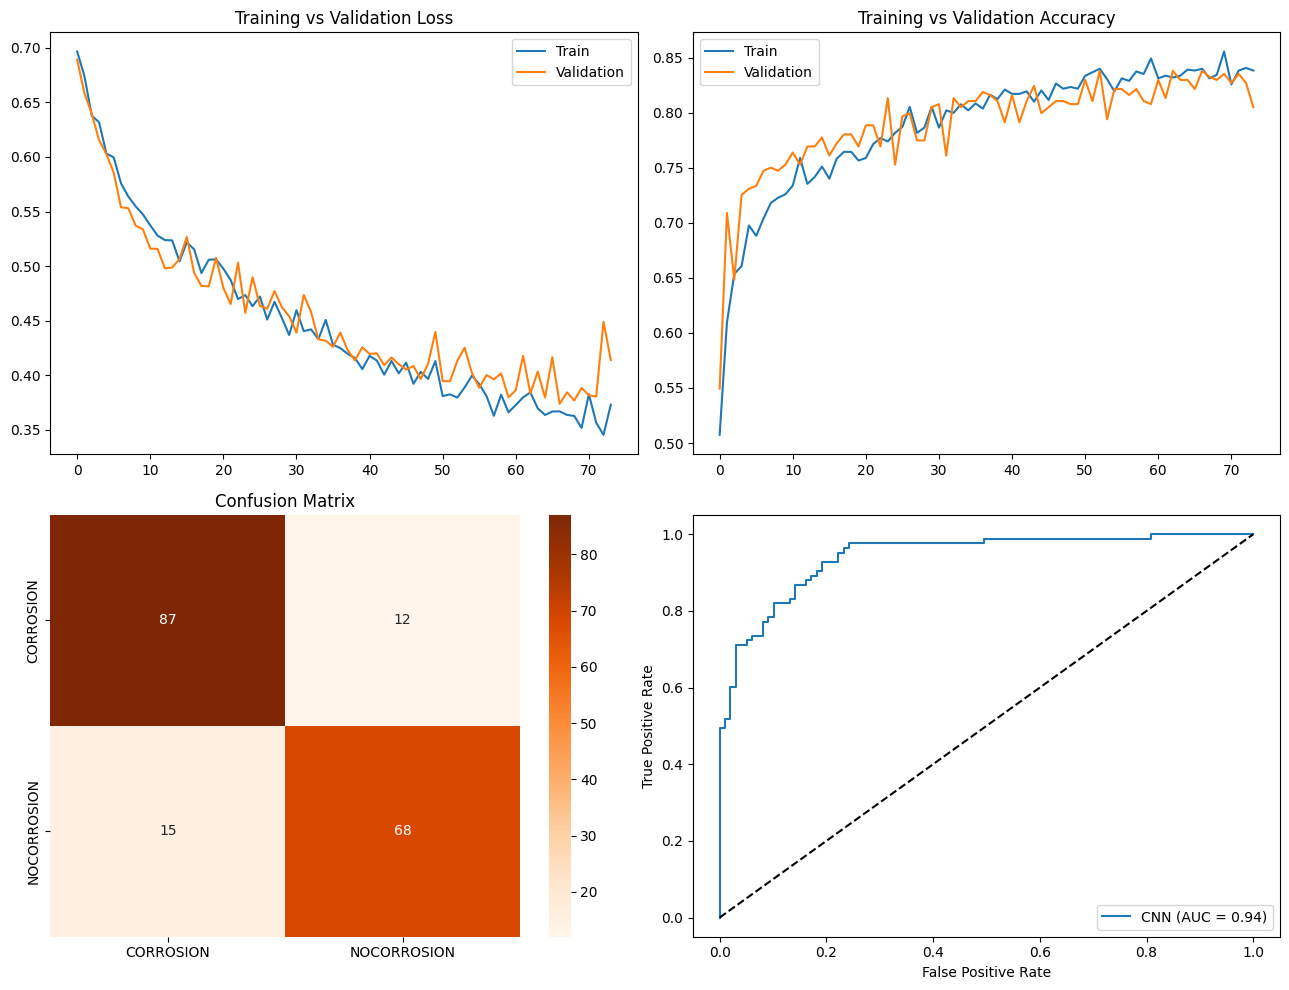


[Summary Statistics]
Accuracy = 85.16% | Precision = 85.29% | Recall = 87.88% | Specificity = 81.93% | F1 Score = 86.57%


In [23]:
create_charts(cnn_7, cnn_model_7)
